In [ ]:
#LSTM

#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal
from scipy.signal import stft

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras as keras
import tensorflow as tf

from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from pandas import DataFrame

from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Daten importieren
xls = pd.ExcelFile('//content/drive/MyDrive/Testdaten.xlsx')
dataframes = [pd.read_excel(xls, f'Test{i}') for i in range(1, 8)]

final_arrays = [df['Hammer P'] for df in dataframes]
df_num=7

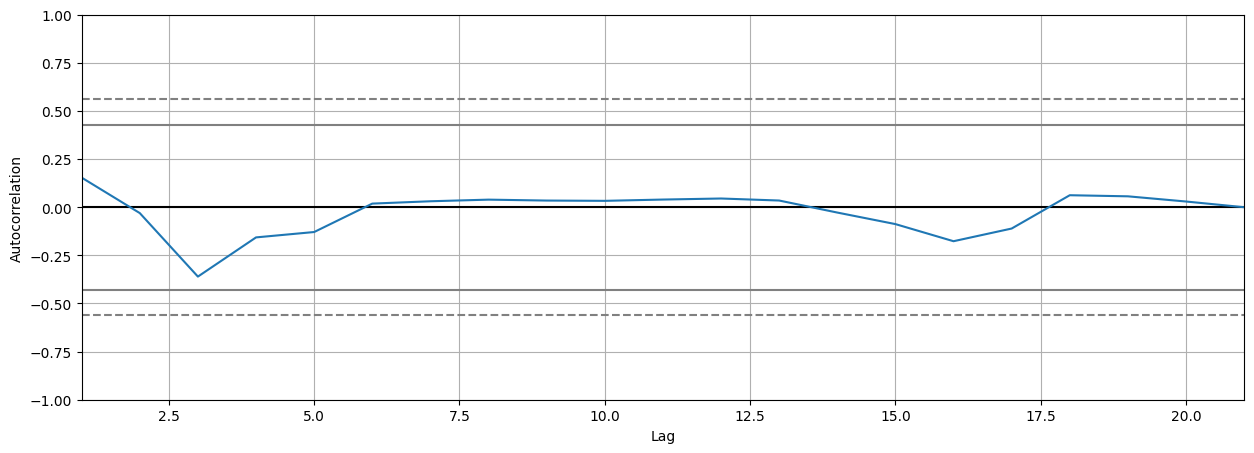

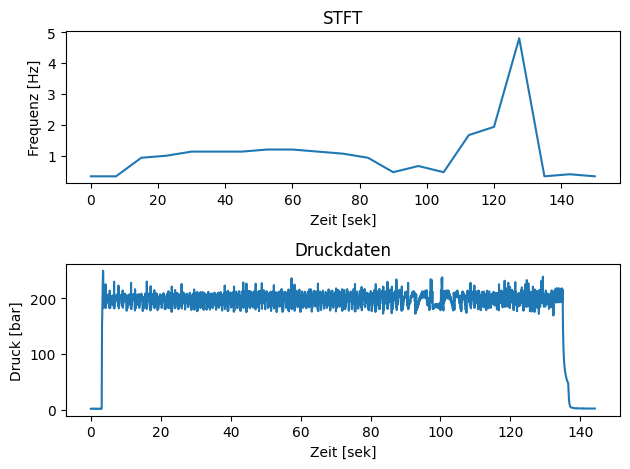

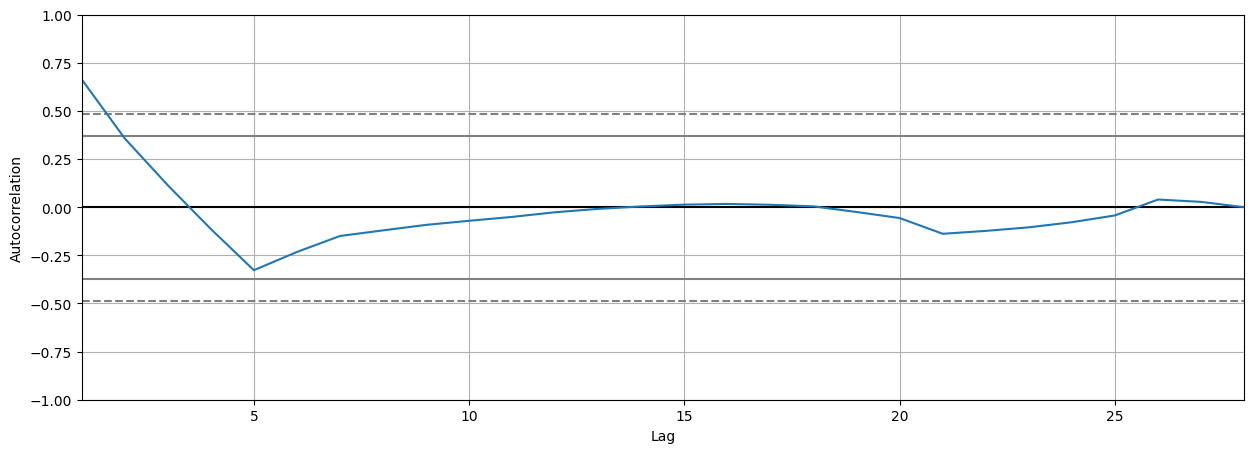

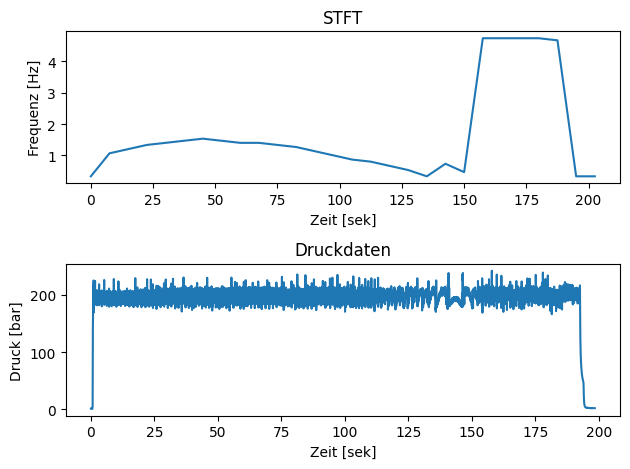

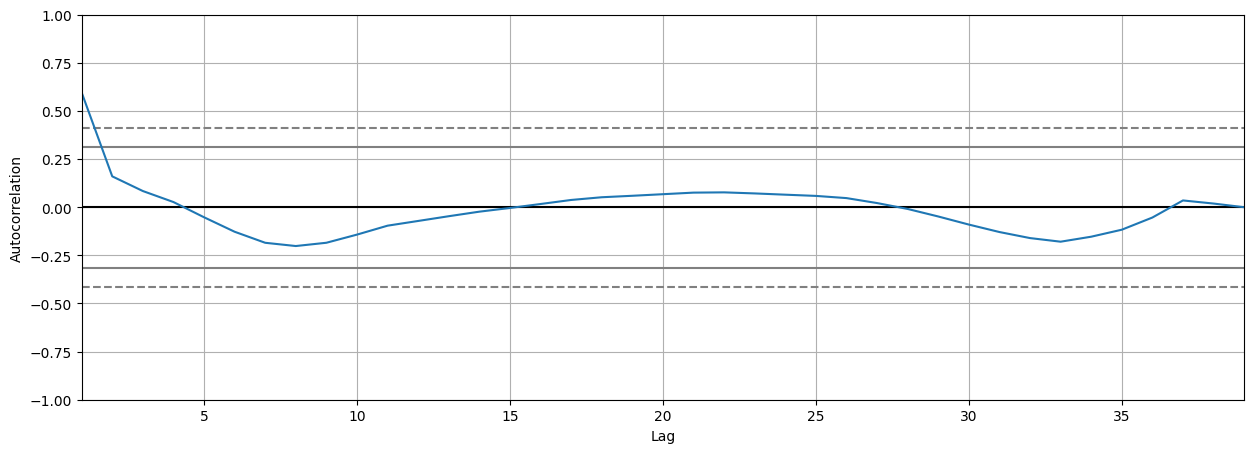

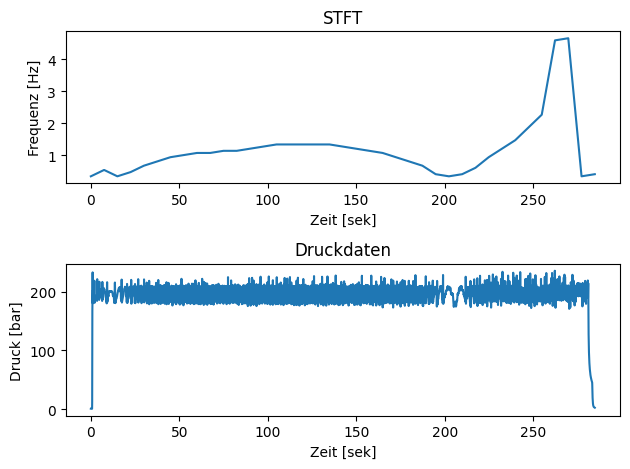

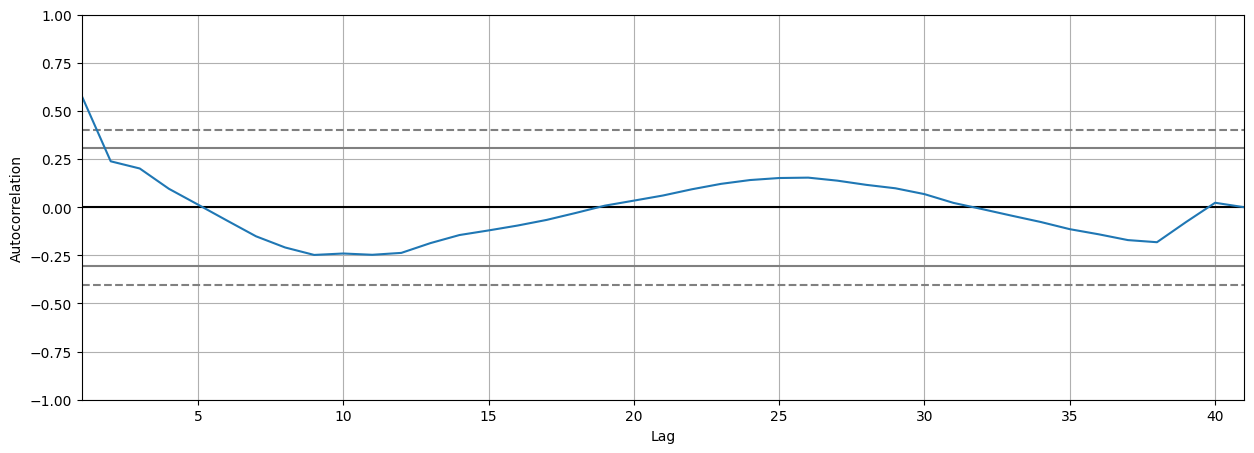

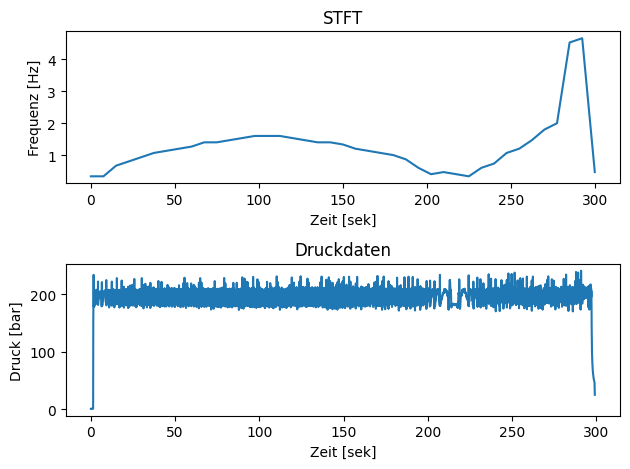

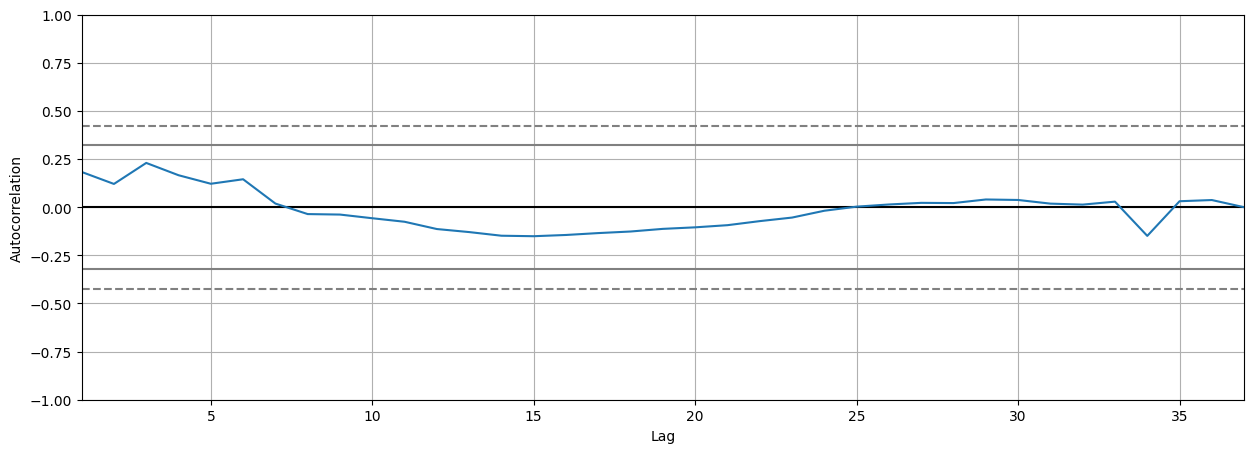

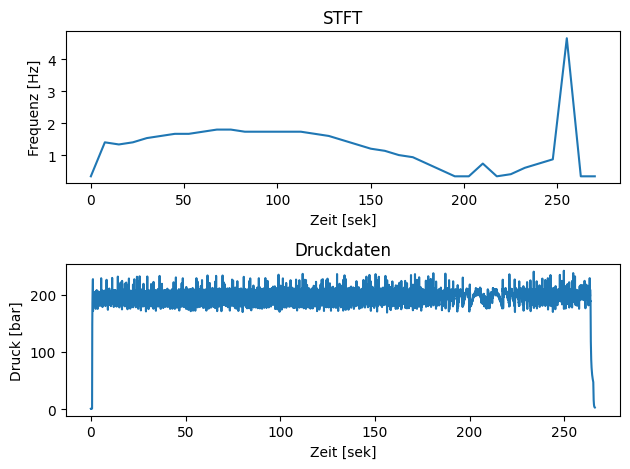

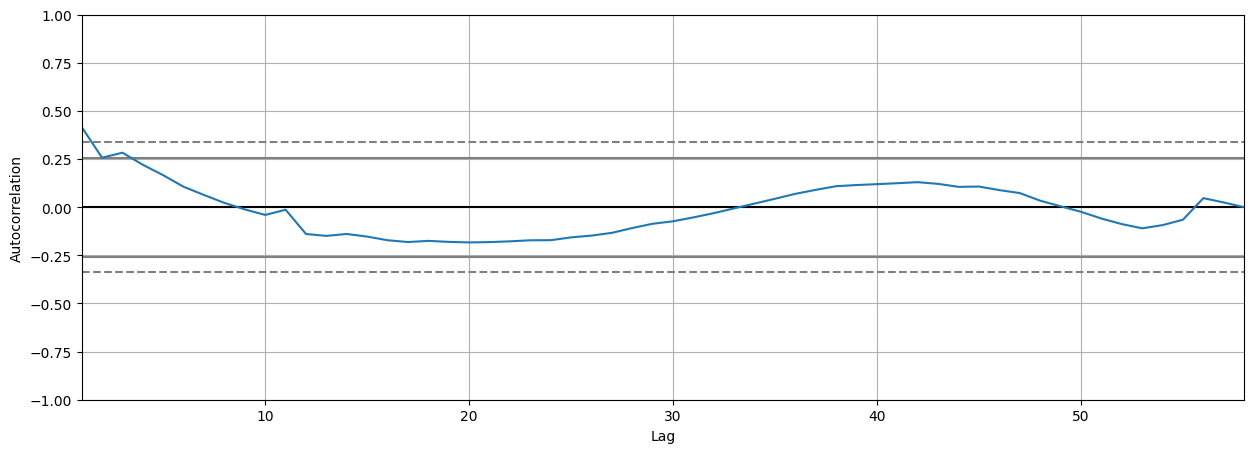

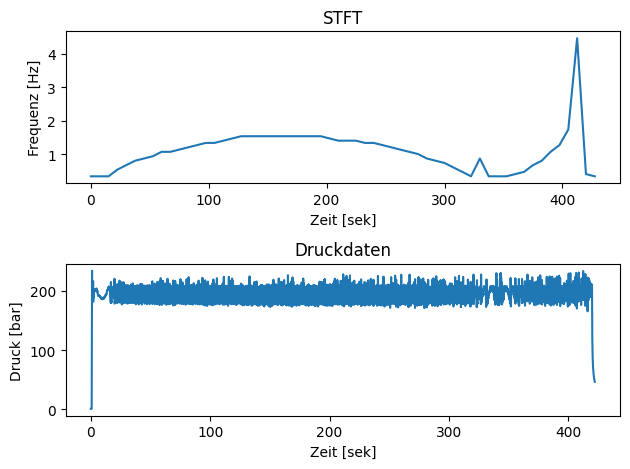

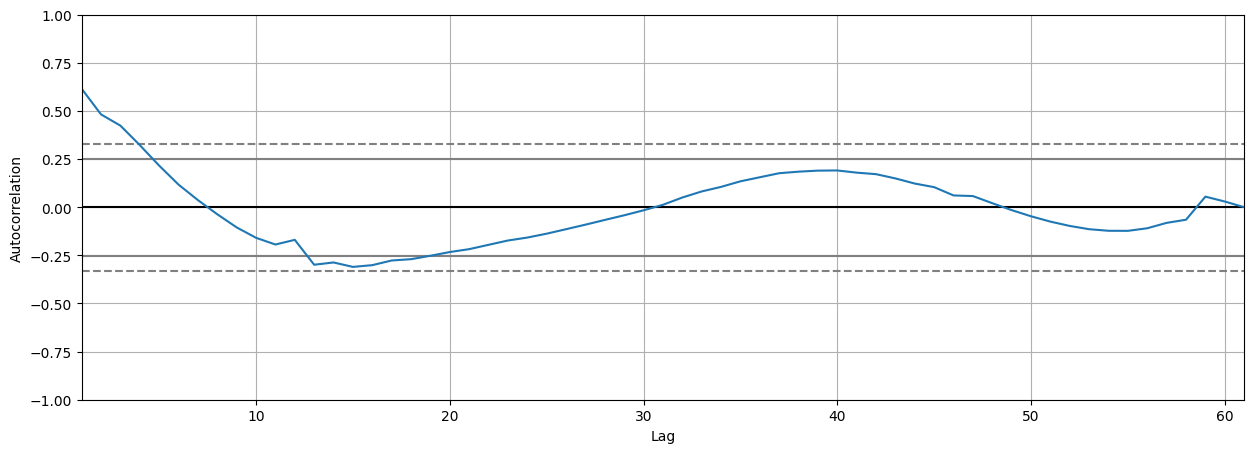

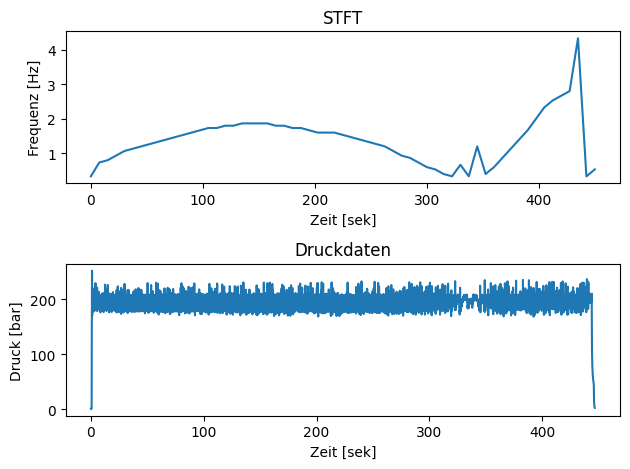

In [ ]:
#STFT durchführen, Ergebnis filtern und dominante Frequenzen extrahieren
dominant_freqs_all = []
t_all = []
for i in range(df_num):
  plt.subplots(1,1, sharex=True, figsize=(15,5))
  f,t,Zxx = signal.stft(final_arrays[i],fs=20, nperseg=300, noverlap=150) #STFT erstellen
  threshold = 0.3
  Zxx[f < threshold, :] = 0 #Nur Frequenzen über Threshhold einbeziehen
  dominant_freqs = f[np.argmax(np.abs(Zxx), axis=0)]
  autocorrelation_plot(dominant_freqs)
  pyplot.show()
  plt.subplot(211)
  plt.plot(t,dominant_freqs)
  plt.title('STFT')
  plt.ylabel('Frequenz [Hz]')
  plt.xlabel('Zeit [sek]')

  dauer_in_s = final_arrays[i].size / 20
  zeitpunkte = np.linspace(0, dauer_in_s, final_arrays[i].size, endpoint=False)
  plt.subplot(212)
  plt.plot(zeitpunkte,final_arrays[i])
  plt.title('Druckdaten')
  plt.ylabel('Druck [bar]')
  plt.xlabel('Zeit [sek]')
  plt.tight_layout()
  dominant_freqs_all.append(dominant_freqs.copy())
  t_all.append(t.copy())


<ipython-input-6-020fd9edde4a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


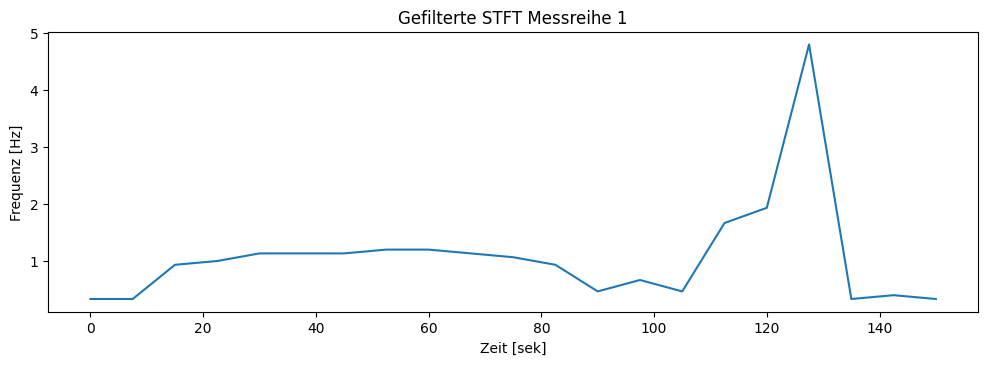

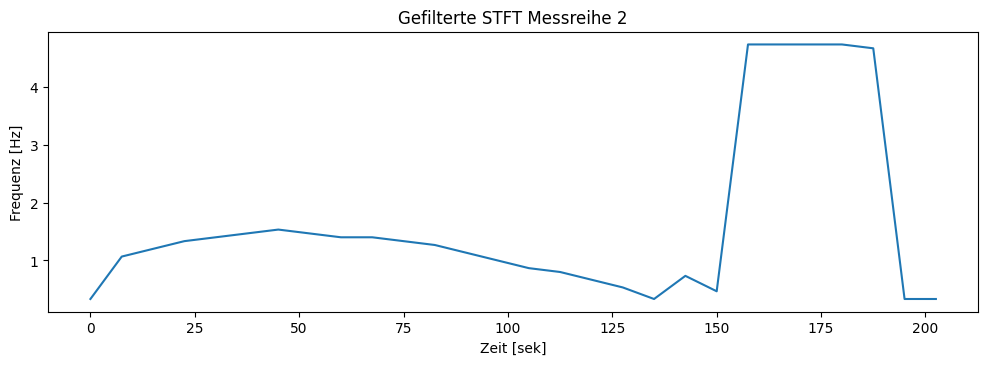

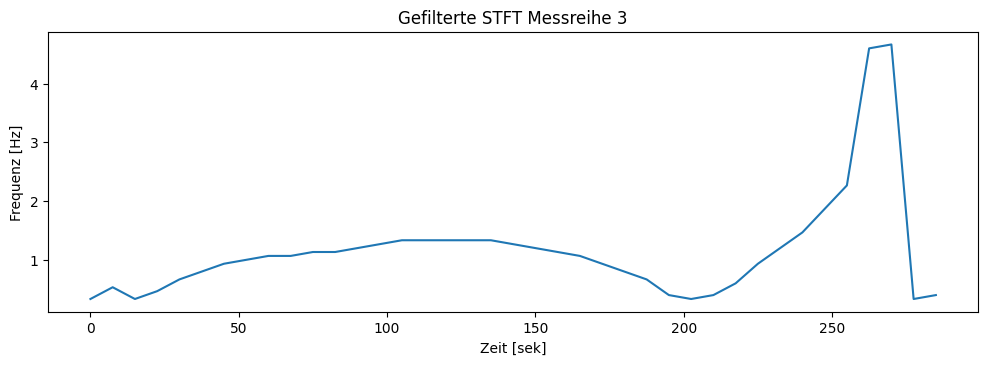

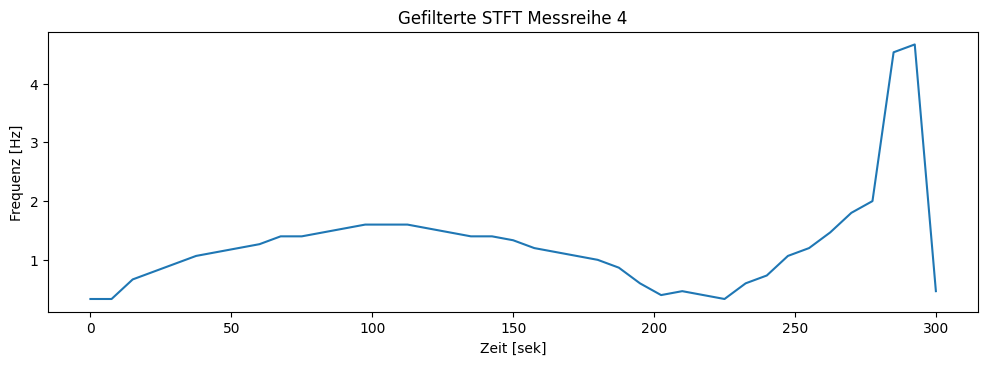

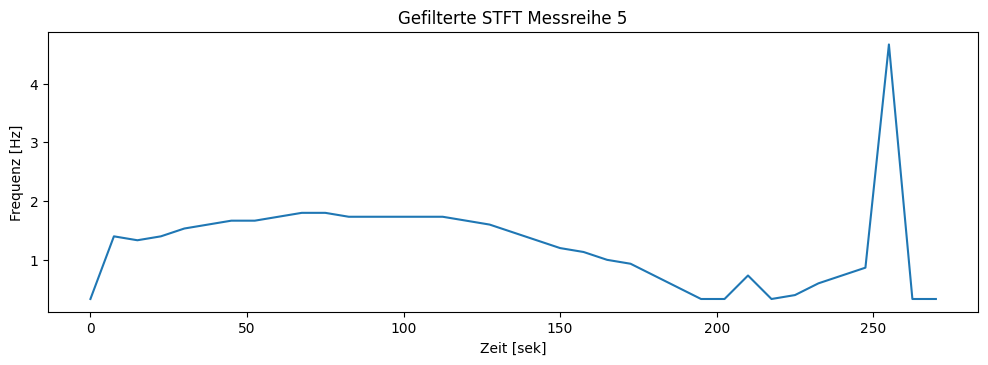

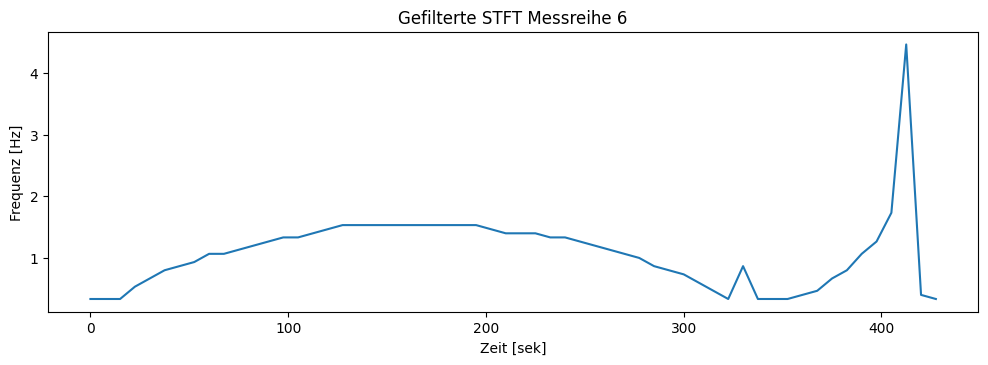

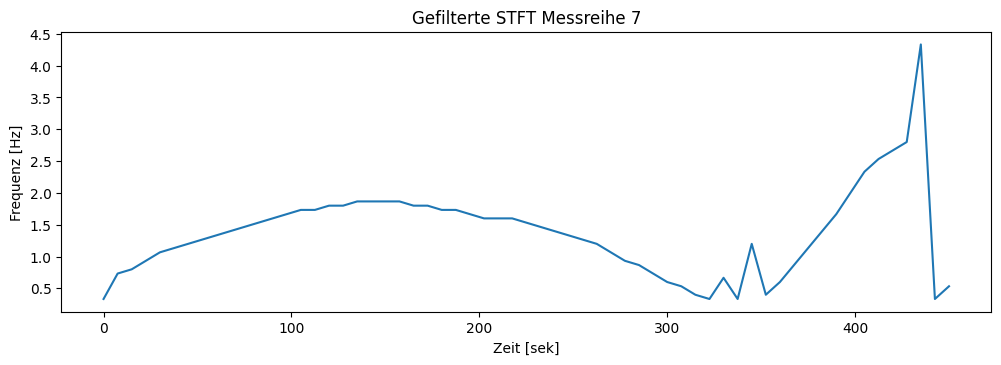

In [ ]:
dominant_freqs_all = []
for i in range(df_num):
  plt.subplots(1,1, sharex=True, figsize=(12,8))
  f,t,Zxx = signal.stft(final_arrays[i],fs=20, nperseg=300, noverlap=150)
  threshold = 0.3
  Zxx[f < threshold, :] = 0
  dominant_freqs = f[np.argmax(np.abs(Zxx), axis=0)]
  plt.subplot(211)
  plt.plot(t,dominant_freqs)
  plt.title(f'Gefilterte STFT Messreihe {i+1}')
  plt.ylabel('Frequenz [Hz]')
  plt.xlabel('Zeit [sek]')


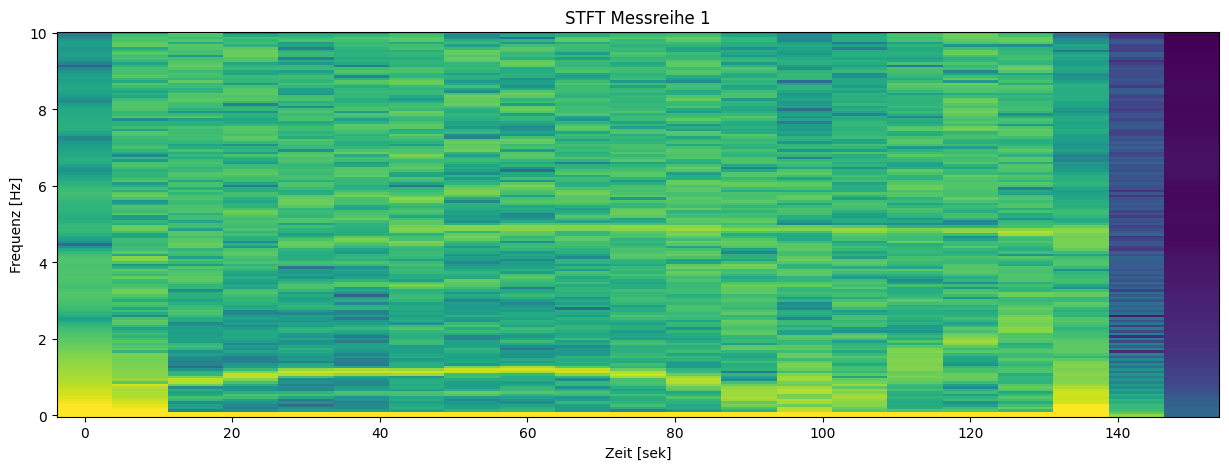

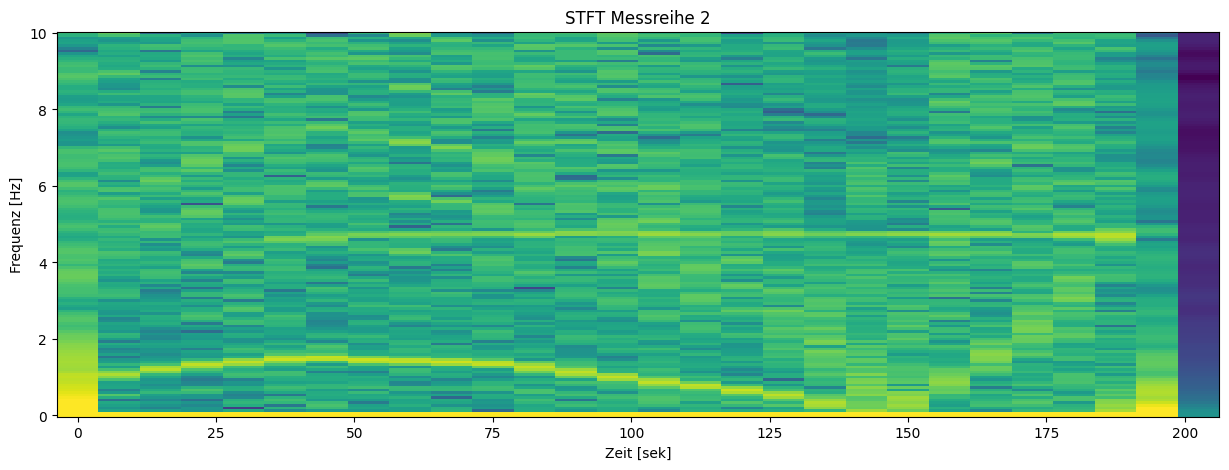

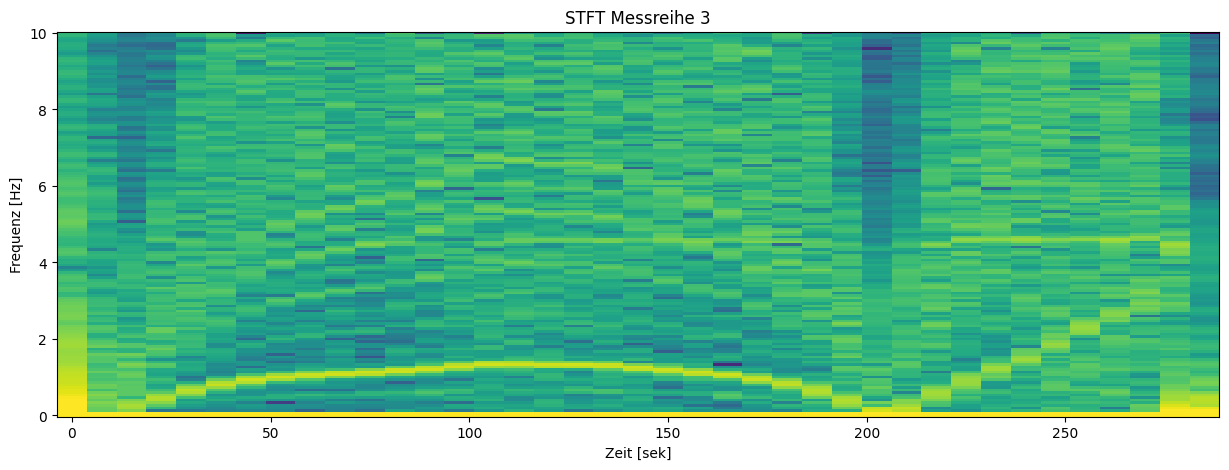

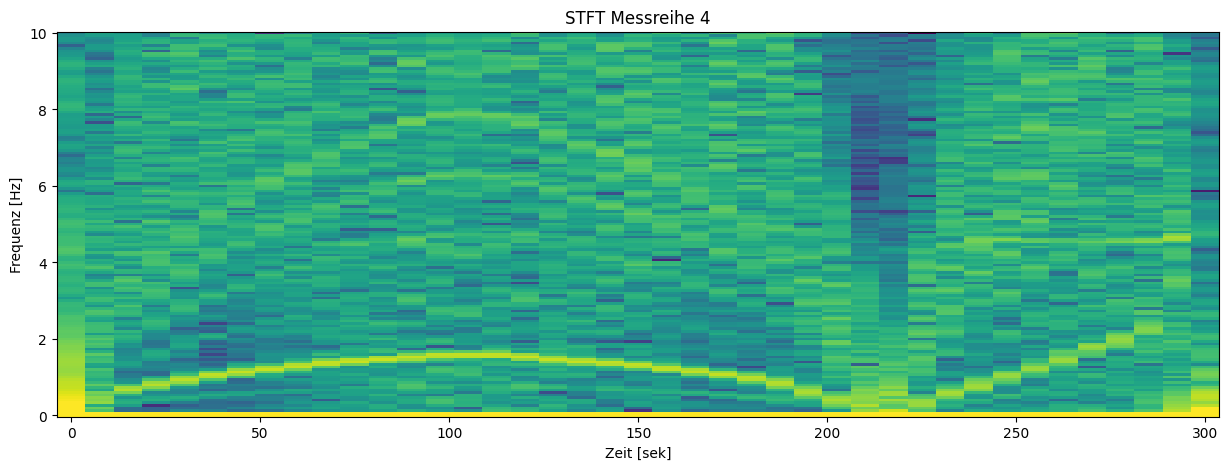

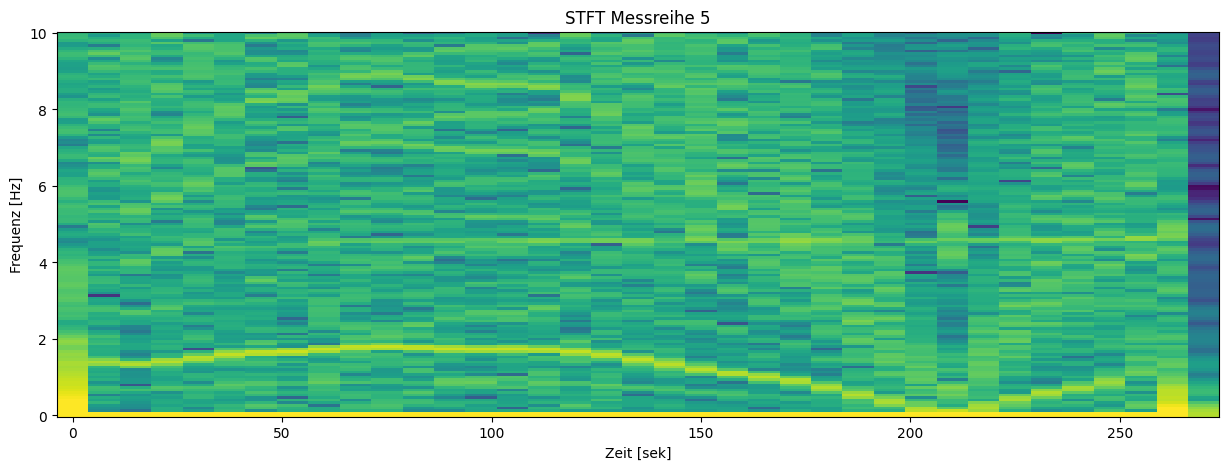

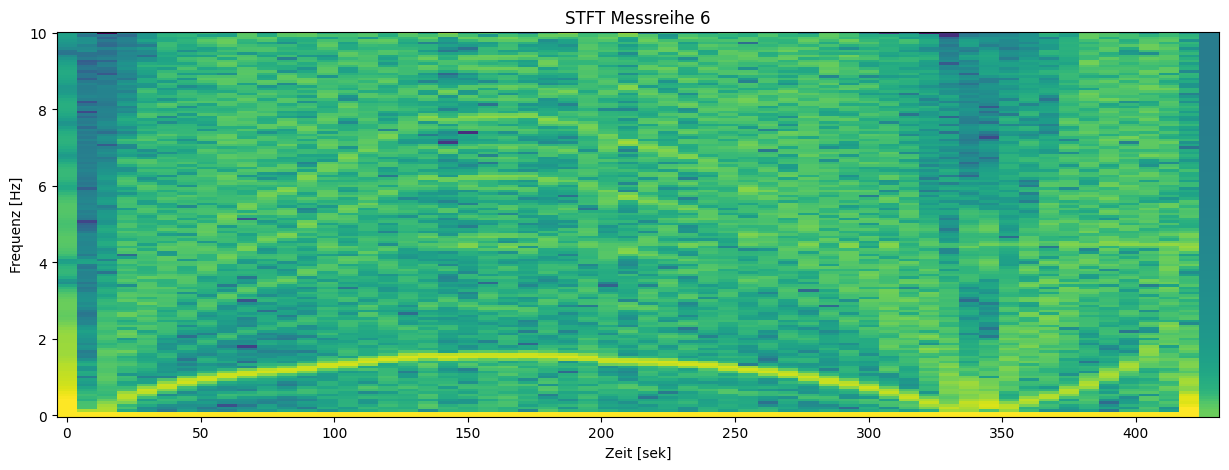

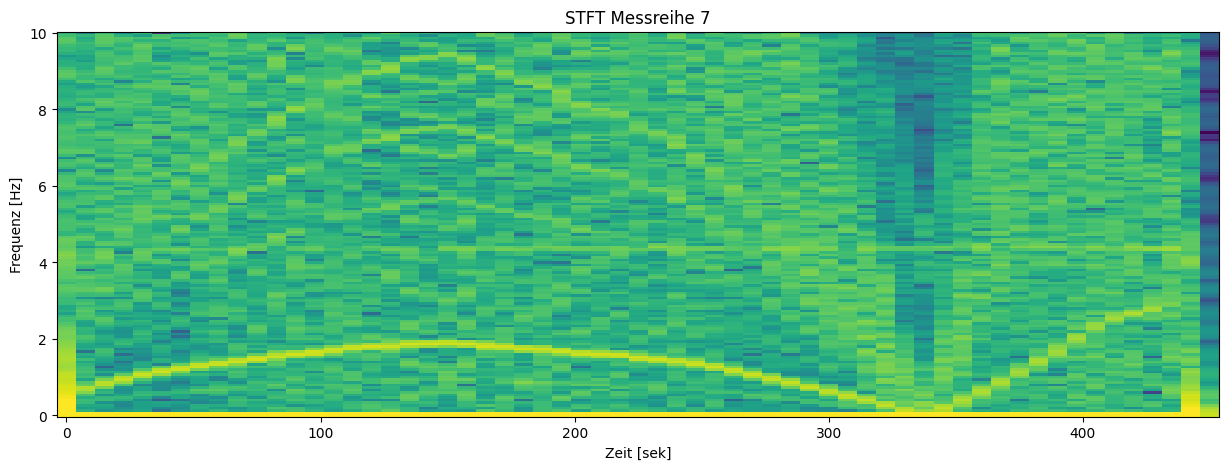

In [ ]:
dominant_freqs_all = []
for i in range(df_num):
  plt.subplots(1,1, sharex=True, figsize=(15,5))
  f,t,Zxx = signal.stft(final_arrays[i],fs=20, nperseg=300, noverlap=150)
  plt.subplot
  plt.pcolormesh(t, f, 10 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmax=10)
  plt.title(f'STFT Messreihe {i+1}')
  plt.ylabel('Frequenz [Hz]')
  plt.xlabel('Zeit [sek]')

<ipython-input-8-26b75141e389>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(212)


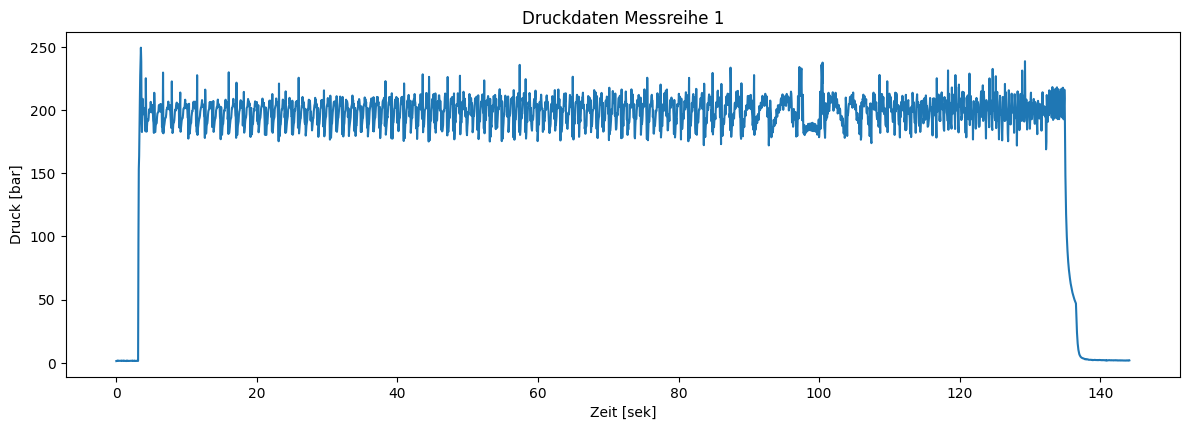

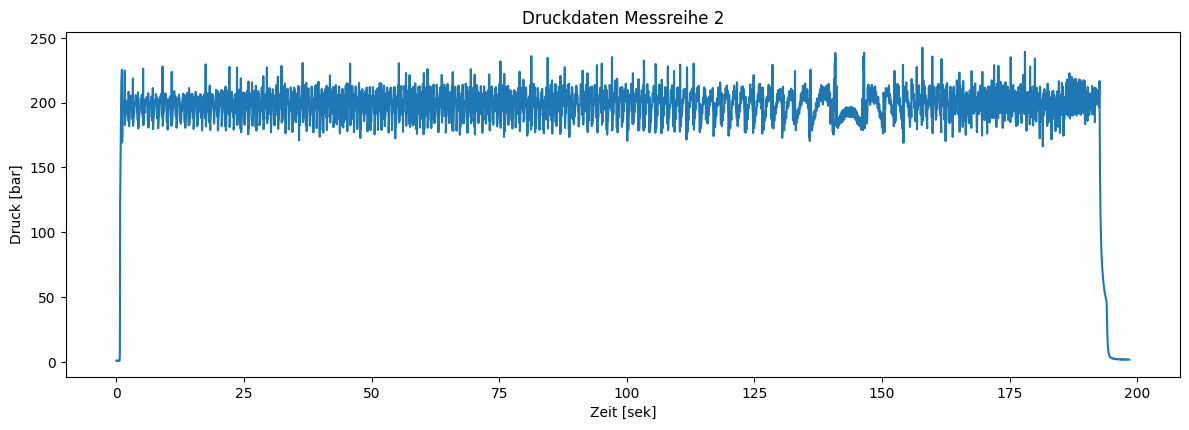

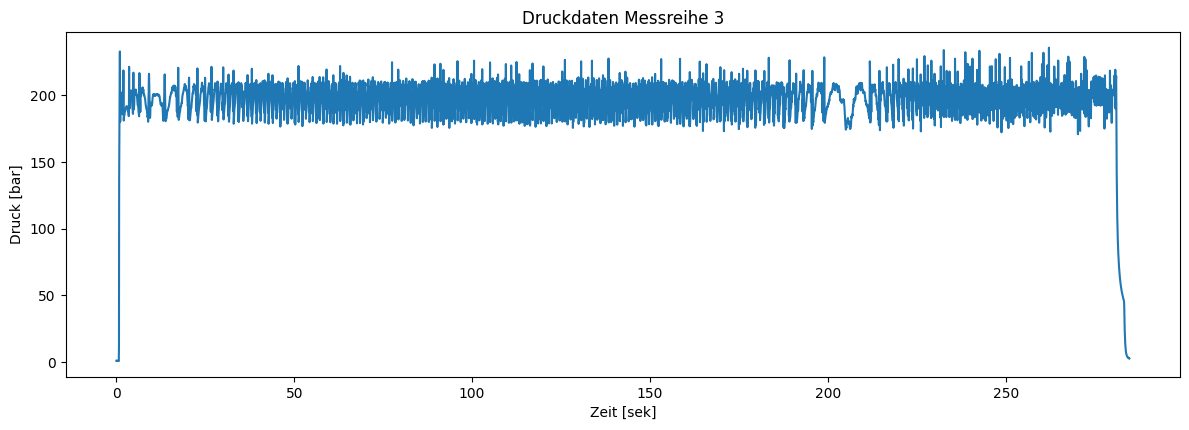

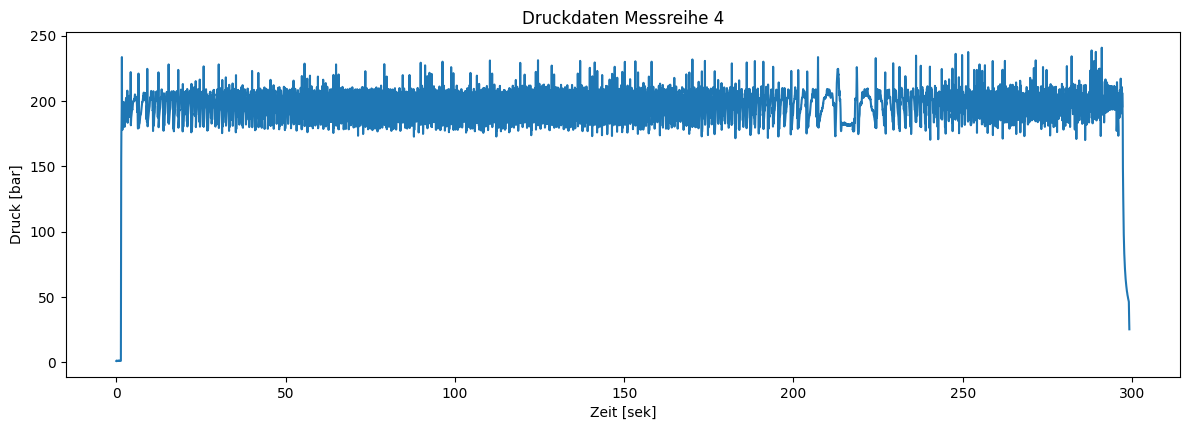

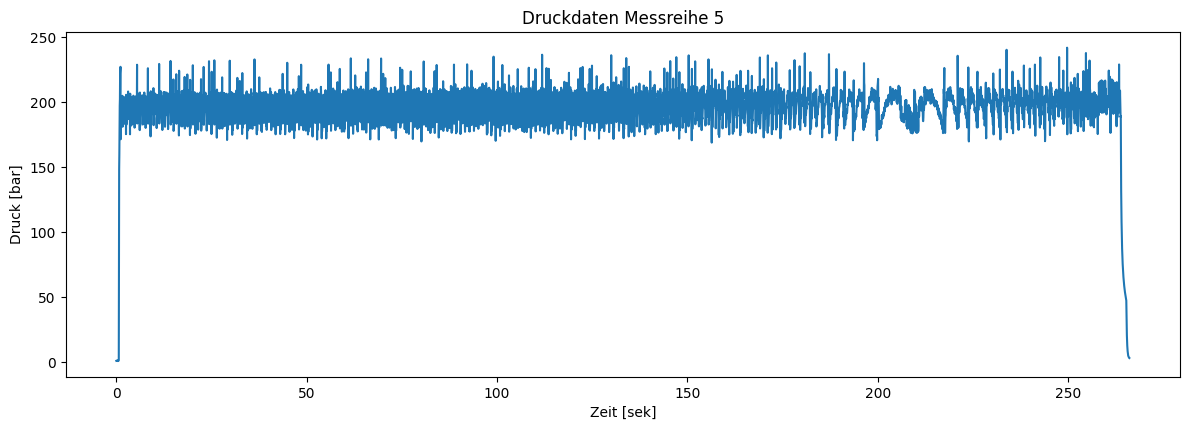

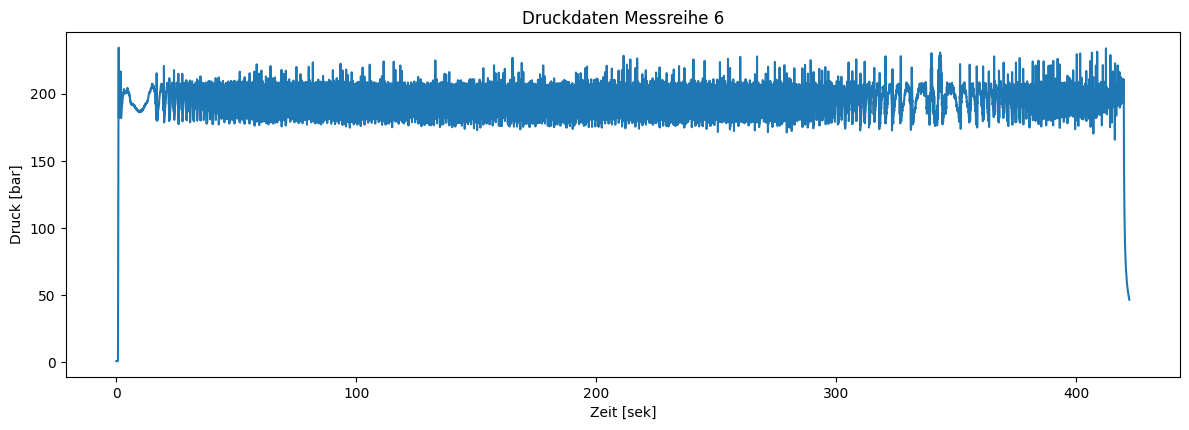

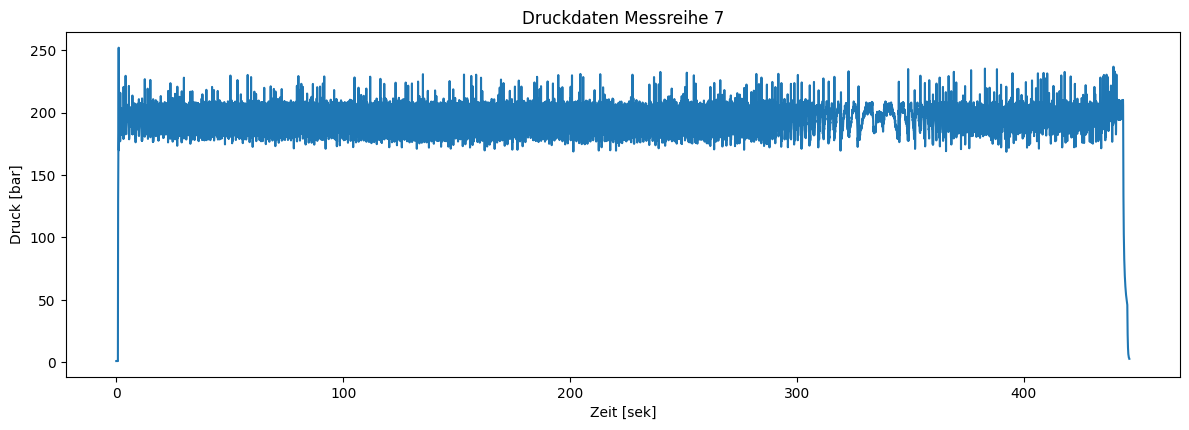

In [ ]:
dominant_freqs_all = []
for i in range(df_num):
  plt.subplots(1,1, sharex=True, figsize=(12,8))
  f,t,Zxx = signal.stft(final_arrays[i],fs=20, nperseg=300, noverlap=150)
  threshold = 0.3
  Zxx[f < threshold, :] = 0
  dominant_freqs = f[np.argmax(np.abs(Zxx), axis=0)]

  dauer_in_s = final_arrays[i].size / 20
  zeitpunkte = np.linspace(0, dauer_in_s, final_arrays[i].size, endpoint=False)
  plt.subplot(212)
  plt.plot(zeitpunkte,final_arrays[i])
  plt.title(f'Druckdaten Messreihe {i+1}')
  plt.ylabel('Druck [bar]')
  plt.xlabel('Zeit [sek]')
  plt.tight_layout()
  dominant_freqs_all.append(dominant_freqs.copy())


<ipython-input-9-20f23f2c23e8>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)
<ipython-input-9-20f23f2c23e8>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


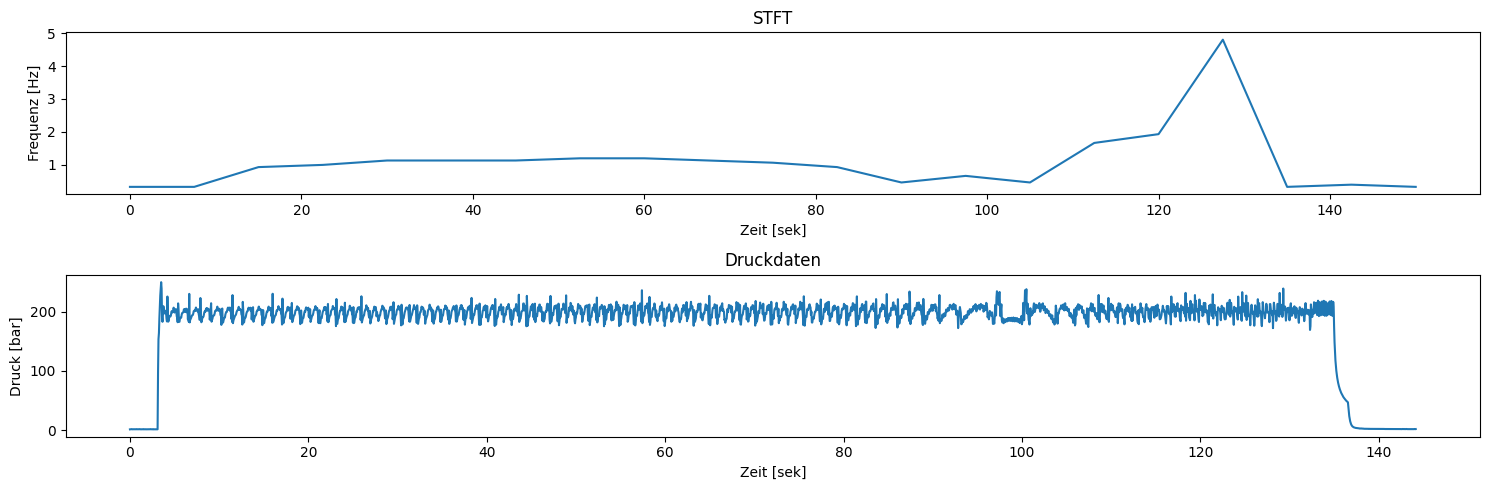

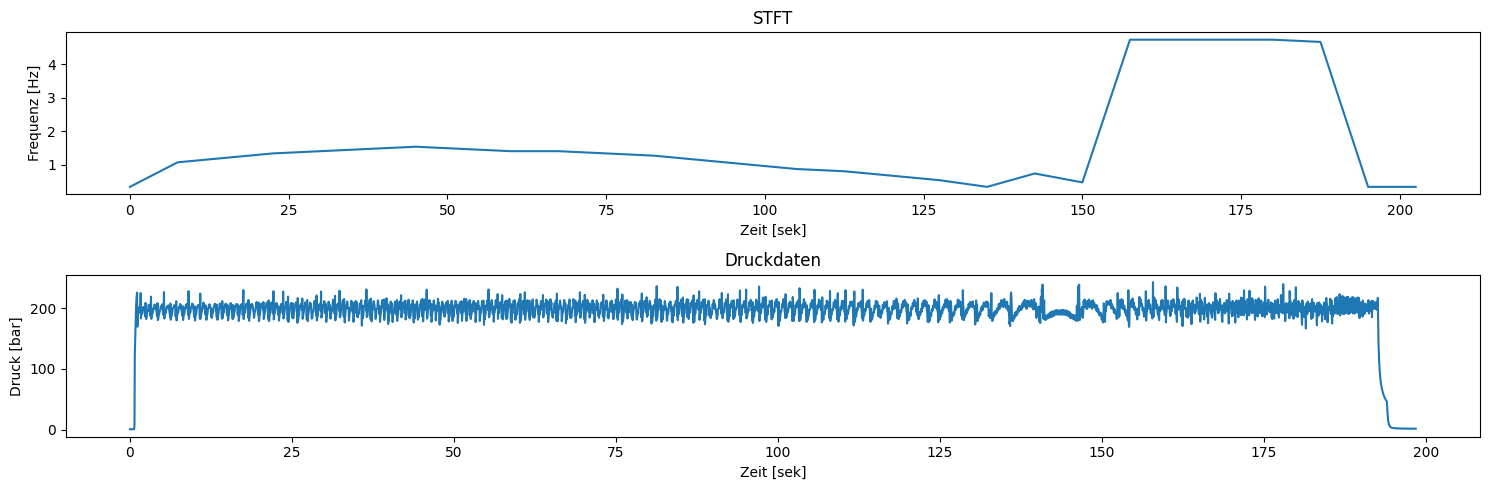

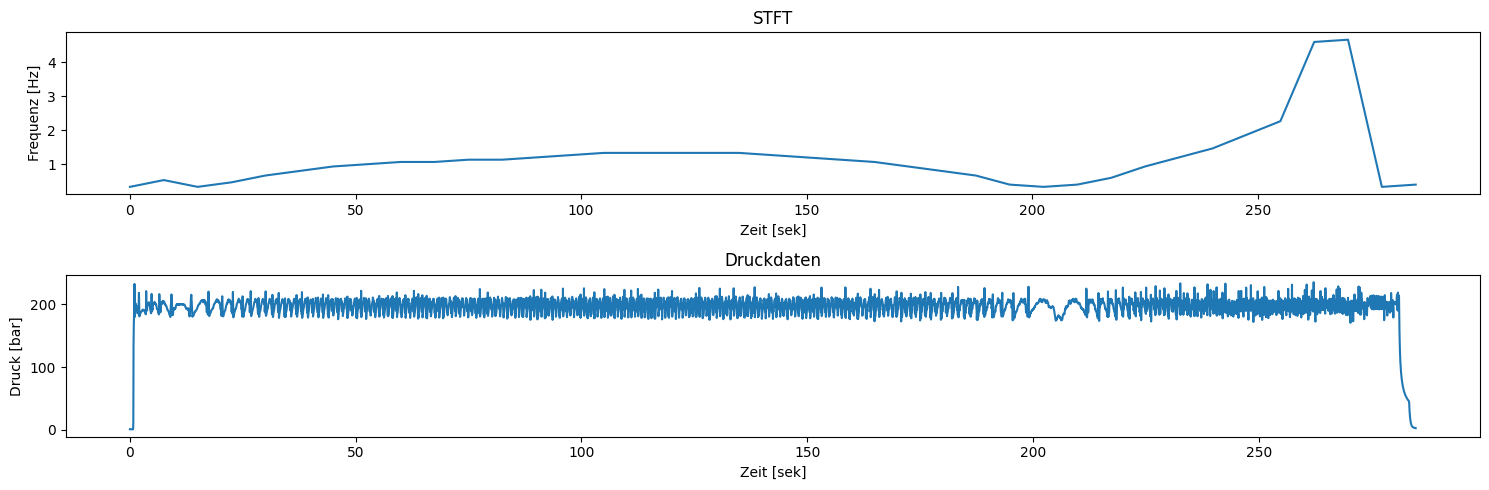

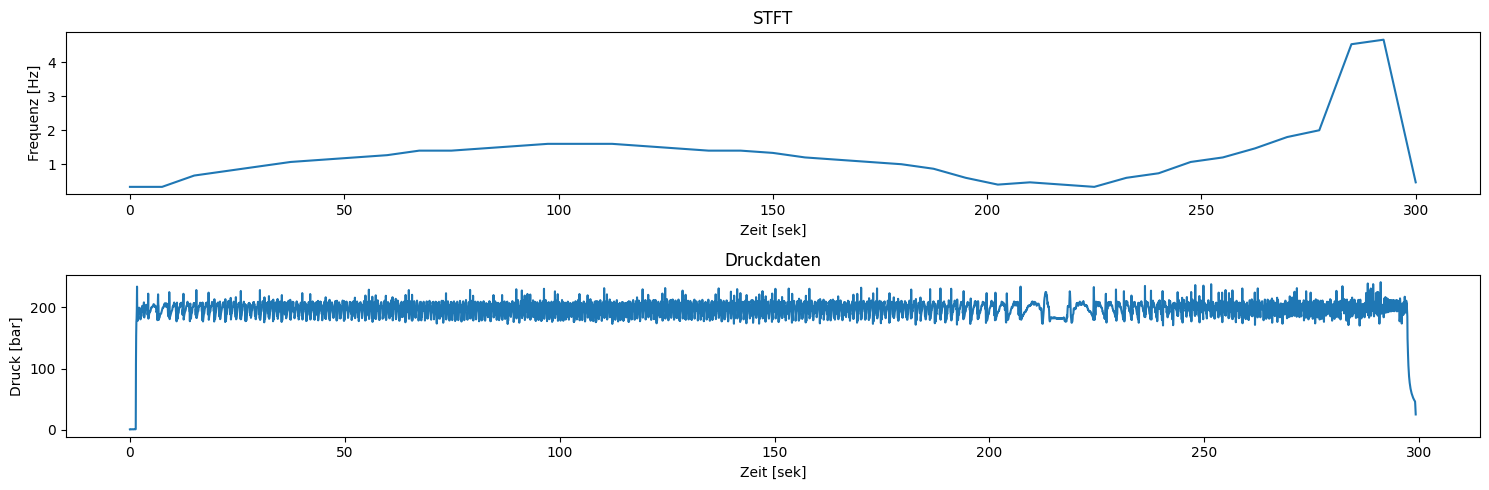

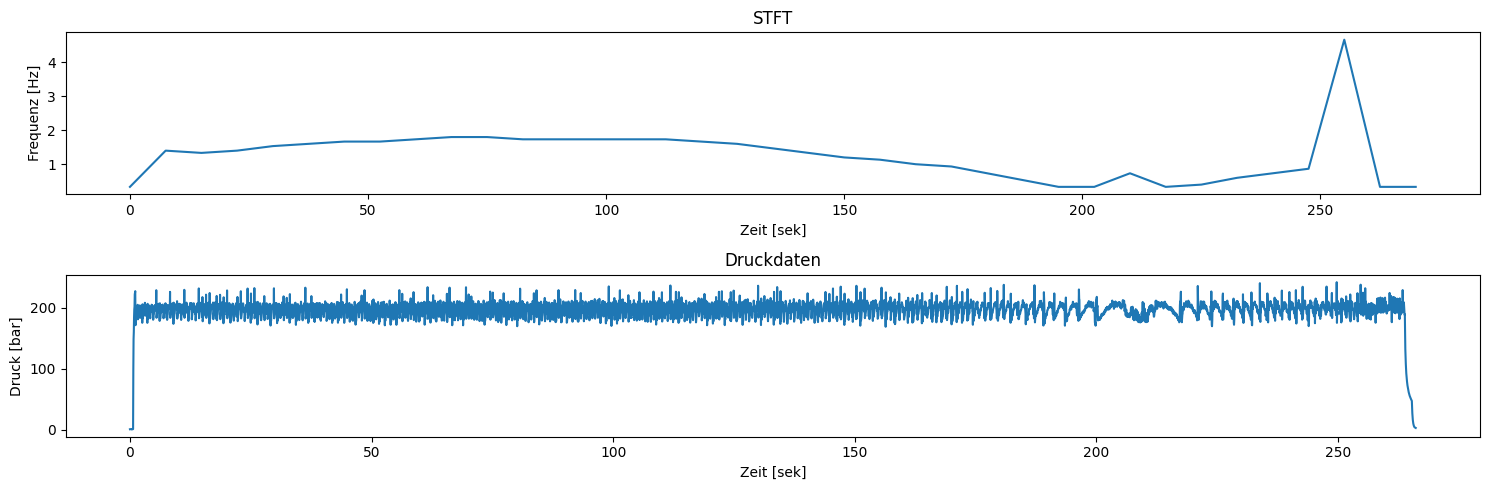

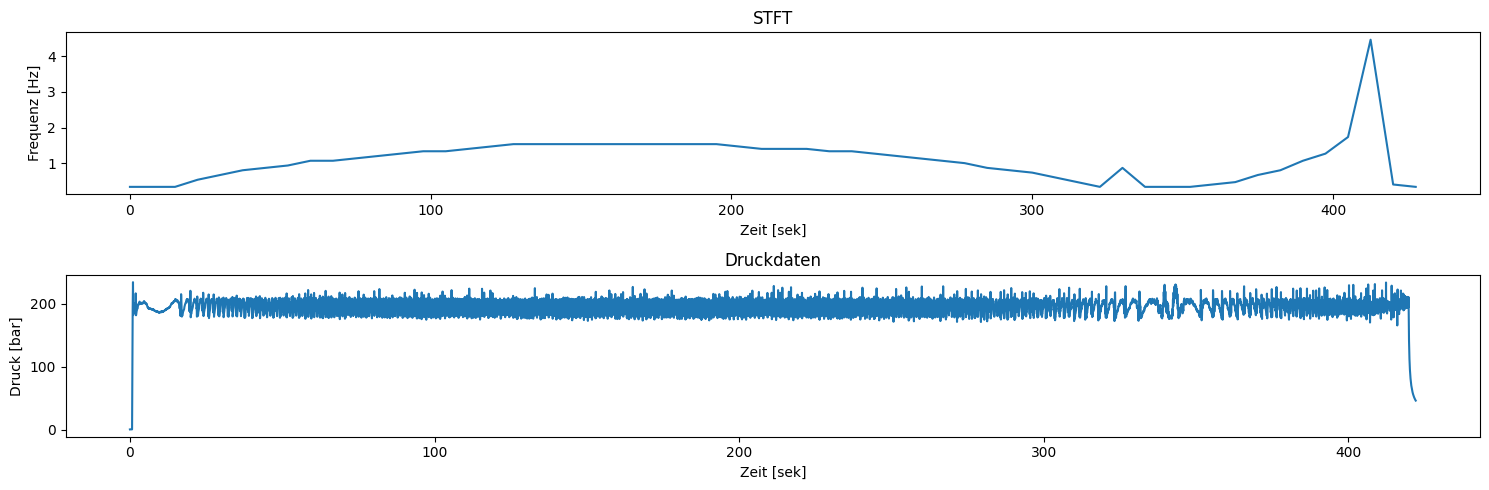

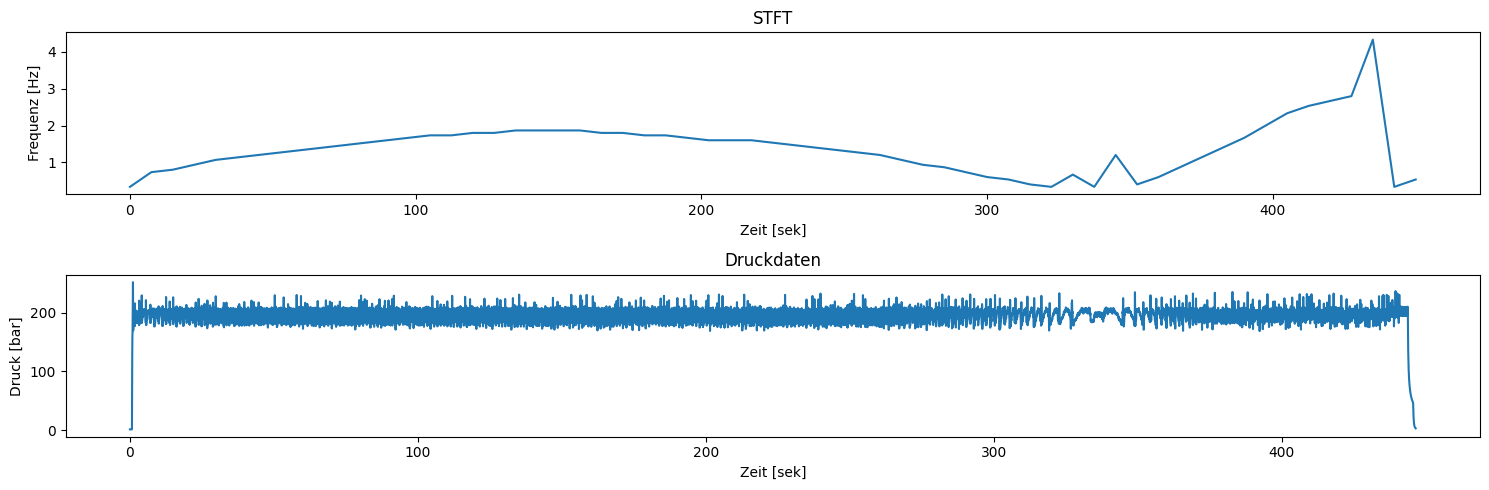

In [ ]:
dominant_freqs_all = []
for i in range(df_num):
  plt.subplots(1,1, sharex=True, figsize=(15,5))
  f,t,Zxx = signal.stft(final_arrays[i],fs=20, nperseg=300, noverlap=150)
  threshold = 0.3
  Zxx[f < threshold, :] = 0
  dominant_freqs = f[np.argmax(np.abs(Zxx), axis=0)]
  plt.subplot(211)
  plt.plot(t,dominant_freqs)
  plt.title('STFT')
  plt.ylabel('Frequenz [Hz]')
  plt.xlabel('Zeit [sek]')

  dauer_in_s = final_arrays[i].size / 20
  zeitpunkte = np.linspace(0, dauer_in_s, final_arrays[i].size, endpoint=False)
  plt.subplot(212)
  plt.plot(zeitpunkte,final_arrays[i])
  plt.title('Druckdaten')
  plt.ylabel('Druck [bar]')
  plt.xlabel('Zeit [sek]')
  plt.tight_layout()
  dominant_freqs_all.append(dominant_freqs.copy())


Epoch 1/50
17/17 [==============================] - 5s 37ms/step - loss: 0.0836
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0702
Epoch 3/50
17/17 [==============================] - 0s 11ms/step - loss: 0.0601
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0472
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0448
Epoch 7/50
17/17 [==============================] - 1s 88ms/step - loss: 0.0437
Epoch 8/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0427
Epoch 9/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0424
Epoch 10/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0423
Epoch 11/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0418
Epoch 12/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0415
Epoch 13/50
17/17 [===========================

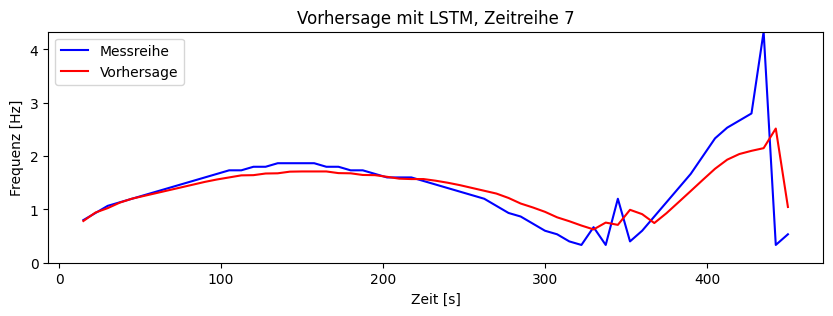

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 5)], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[6]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[6][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title('Vorhersage mit LSTM, Zeitreihe 7')
plt.plot(t_all[6][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:42+sequence_length], y_pred[:42]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.149


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 5)], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[6]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[6][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title('Vorhersage mit LSTM, Zeitreihe 7')
plt.plot(t_all[6][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]', fontsize=18)
plt.ylabel('Frequenz [Hz]', fontsize=18)
plt.legend()
plt.show()

NameError: ignored

In [ ]:
maybe: https://stackoverflow.com/questions/38714959/understanding-keras-lstms -> many to many

Epoch 1/50
17/17 [==============================] - 4s 5ms/step - loss: 0.0942
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0837
Epoch 3/50
17/17 [==============================] - 2s 97ms/step - loss: 0.0747
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0662
Epoch 5/50
17/17 [==============================] - 1s 56ms/step - loss: 0.0595
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 7/50
17/17 [==============================] - 1s 50ms/step - loss: 0.0504
Epoch 8/50
17/17 [==============================] - 1s 60ms/step - loss: 0.0480
Epoch 9/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 10/50
17/17 [==============================] - 1s 65ms/step - loss: 0.0445
Epoch 11/50
17/17 [==============================] - 1s 62ms/step - loss: 0.0435
Epoch 12/50
17/17 [==============================] - 1s 58ms/step - loss: 0.0425
Epoch 13/50
17/17 [=======================

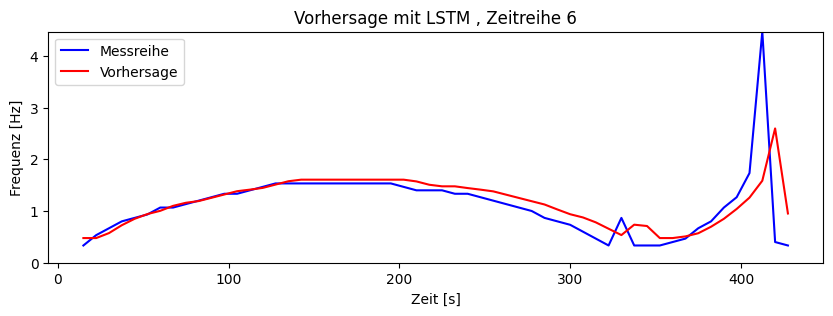

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

z=5 #hier betrachtete Zeitreihe eintragen, bei 0 anfangend
# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 6) if i != z], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[z]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[z][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title(f'Vorhersage mit LSTM , Zeitreihe {z+1}')
plt.plot(t_all[z][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:27+sequence_length], y_pred[:27]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.079


Epoch 1/50
19/19 [==============================] - 4s 7ms/step - loss: 0.0748
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 3/50
19/19 [==============================] - 2s 97ms/step - loss: 0.0587
Epoch 4/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0534
Epoch 5/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0487
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0433
Epoch 8/50
19/19 [==============================] - 1s 48ms/step - loss: 0.0416
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 10/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0398
Epoch 11/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 12/50
19/19 [==============================] - 1s 53ms/step - loss: 0.0383
Epoch 13/50
19/19 [=========================

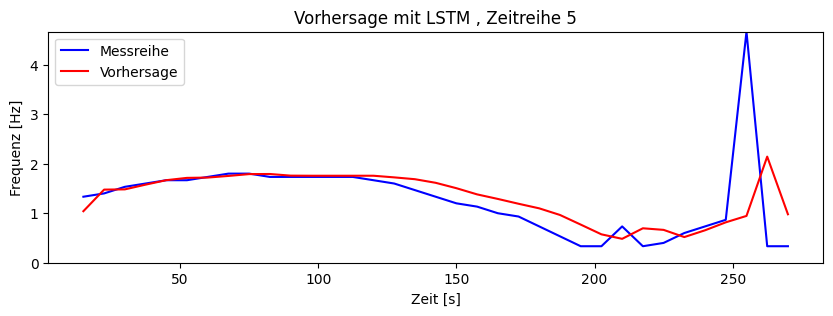

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

z=4
# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 6) if i != z], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[z]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[z][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title(f'Vorhersage mit LSTM , Zeitreihe {z+1}')
plt.plot(t_all[z][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:28+sequence_length], y_pred[:28]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.205


Epoch 1/50
19/19 [==============================] - 5s 84ms/step - loss: 0.0885
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0757
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0667
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0585
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0521
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0446
Epoch 8/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0426
Epoch 9/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0412
Epoch 10/50
19/19 [==============================] - 1s 55ms/step - loss: 0.0396
Epoch 11/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0388
Epoch 12/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0379
Epoch 13/50
19/19 [============================

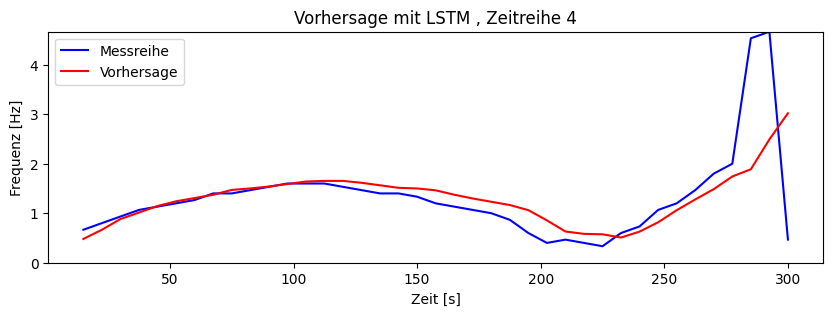

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

z=3
# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 6) if i != z], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[z]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[z][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title(f'Vorhersage mit LSTM , Zeitreihe {z+1}')
plt.plot(t_all[z][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:27+sequence_length], y_pred[:27]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.235


Epoch 1/50
19/19 [==============================] - 3s 6ms/step - loss: 0.0692
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0573
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0494
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0439
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0403
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0386
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0374
Epoch 8/50
19/19 [==============================] - 1s 59ms/step - loss: 0.0368
Epoch 9/50
19/19 [==============================] - 1s 57ms/step - loss: 0.0364
Epoch 10/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0361
Epoch 11/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0356
Epoch 12/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0354
Epoch 13/50
19/19 [============================

2/2 [==============================] - 1s 9ms/step


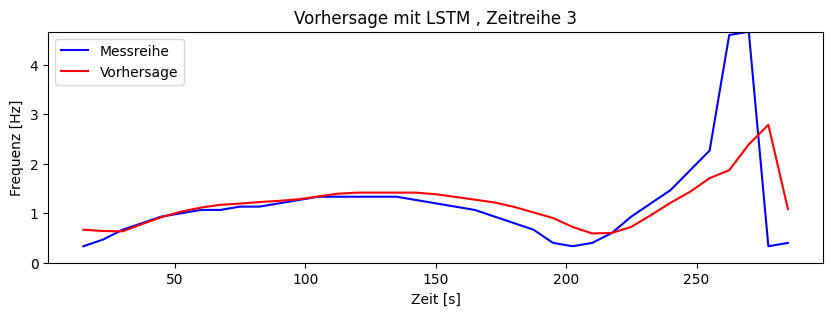

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

z=2
# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 6) if i != z], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[z]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[z][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title(f'Vorhersage mit LSTM , Zeitreihe {z+1}')
plt.plot(t_all[z][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:25+sequence_length], y_pred[:25]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.183


Epoch 1/50
20/20 [==============================] - 4s 47ms/step - loss: 0.0705
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0596
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0519
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0406
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0375
Epoch 7/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0348
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0333
Epoch 9/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0316
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 12/50
20/20 [==============================] - 1s 4ms/step - loss: 0.0305
Epoch 13/50
20/20 [===========================

1/1 [==============================] - 0s 315ms/step


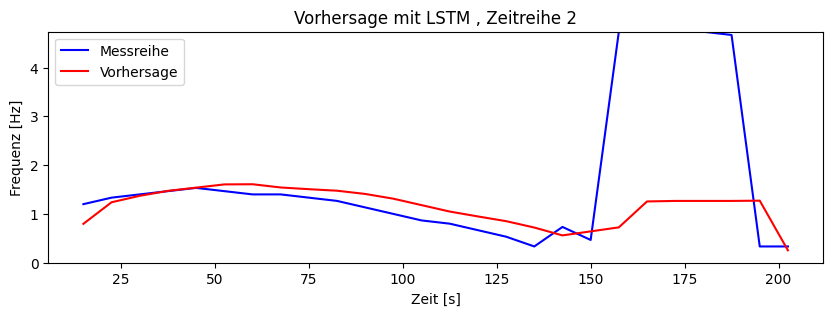

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

z=1
# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 6) if i != z], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[z]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[z][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title(f'Vorhersage mit LSTM , Zeitreihe {z+1}')
plt.plot(t_all[z][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:17+sequence_length], y_pred[:17]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.214


Epoch 1/50
21/21 [==============================] - 3s 5ms/step - loss: 0.0876
Epoch 2/50
21/21 [==============================] - 1s 72ms/step - loss: 0.0707
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0577
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 5/50
21/21 [==============================] - 1s 3ms/step - loss: 0.0432
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0395
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0378
Epoch 8/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 9/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0351
Epoch 11/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 12/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0338
Epoch 13/50
21/21 [============================

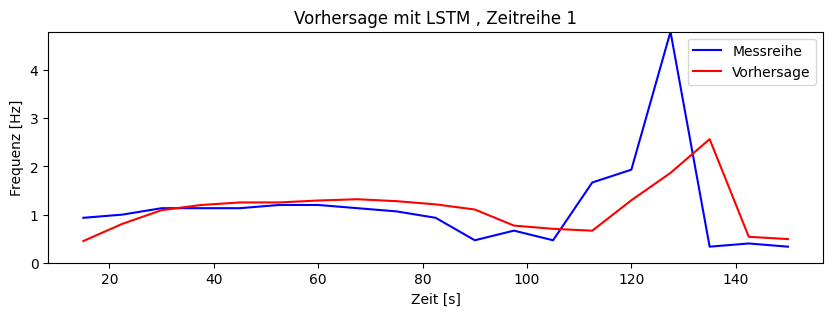

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

z=0
# Trainings-Daten definieren
train_data = np.concatenate([dominant_freqs_all[i] for i in range(0, 6) if i != z], axis=0)

# Test-Daten definieren
test_data = dominant_freqs_all[z]

# Trainings- und Testdaten normalisieren
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_scaled = scaler.transform(test_data.reshape(-1, 1))

# Sequenzieren der Trainingsdaten
sequence_length = 2
X_train, y_train = [], []
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Sequenzieren der Testdaten
X_test = []
for i in range(len(test_scaled) - sequence_length):
    X_test.append(test_scaled[i:i+sequence_length])

X_test = np.array(X_test)

# Vorhersagen mit dem trainierten Modell treffen
y_pred_scaled = model.predict(X_test)

# Vorhersage zurücktransformieren
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 3))
plt.plot(t_all[z][sequence_length:],test_data[sequence_length:], c='blue', label='Messreihe')
plt.title(f'Vorhersage mit LSTM , Zeitreihe {z+1}')
plt.plot(t_all[z][sequence_length:],y_pred, c='red', label='Vorhersage')
plt.ylim(0, max(test_data))
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test_data[sequence_length:13+sequence_length], y_pred[:13]))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.313
